<a href="https://colab.research.google.com/github/leonardo-toffalini/szgepes25-hf/blob/main/szgepes_hf_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feladat

Vizsgálják meg azt a hipotézist, hogy ez a biztosítói kárkifizetés-[adathalmaz](https://canvas.elte.hu/courses/53320/files/3672316/download?wrap=1)  modellezhető lognormális eloszlással!

# Megoldas

In [1]:
load(url("https://github.com/leonardo-toffalini/szgepes25-hf/raw/refs/heads/main/data/insurance.RData"))
ls()  # check if the downloaded data (named `cla`) is in the environment

[1] "cla"

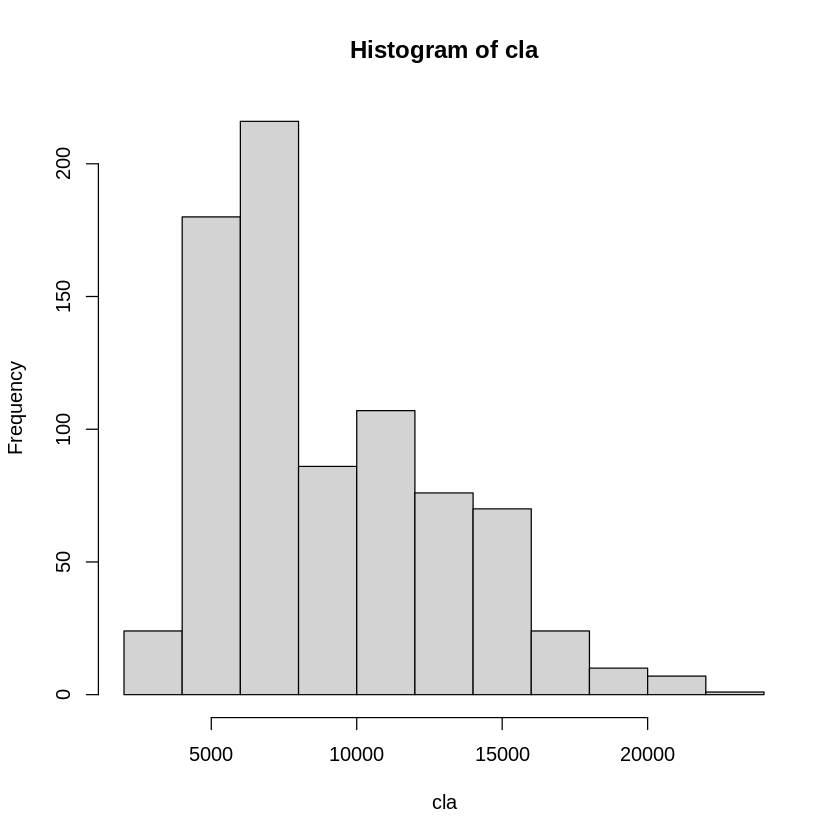

In [2]:
hist(cla)

In [3]:
x <- cla

log_x <- log(x)
mu <- mean(log_x)
sigma <- sd(log_x)

In [4]:
n_bins <- 5
breaks <- quantile(x, probs = seq(0, 1, length.out = n_bins + 1), na.rm = TRUE, type = 7)
breaks[1] <- min(x) - 1e-6
breaks[length(breaks)] <- max(x) + 1e-6

obs_counts <- hist(x, breaks = breaks, plot = FALSE)$counts

In [5]:
expected_probs <- numeric(n_bins)
for (i in 1:n_bins) {
  expected_probs[i] <- plnorm(breaks[i+1], meanlog = mu, sdlog = sigma) -
                       plnorm(breaks[i], meanlog = mu, sdlog = sigma)
}
expected_counts <- expected_probs * length(x)

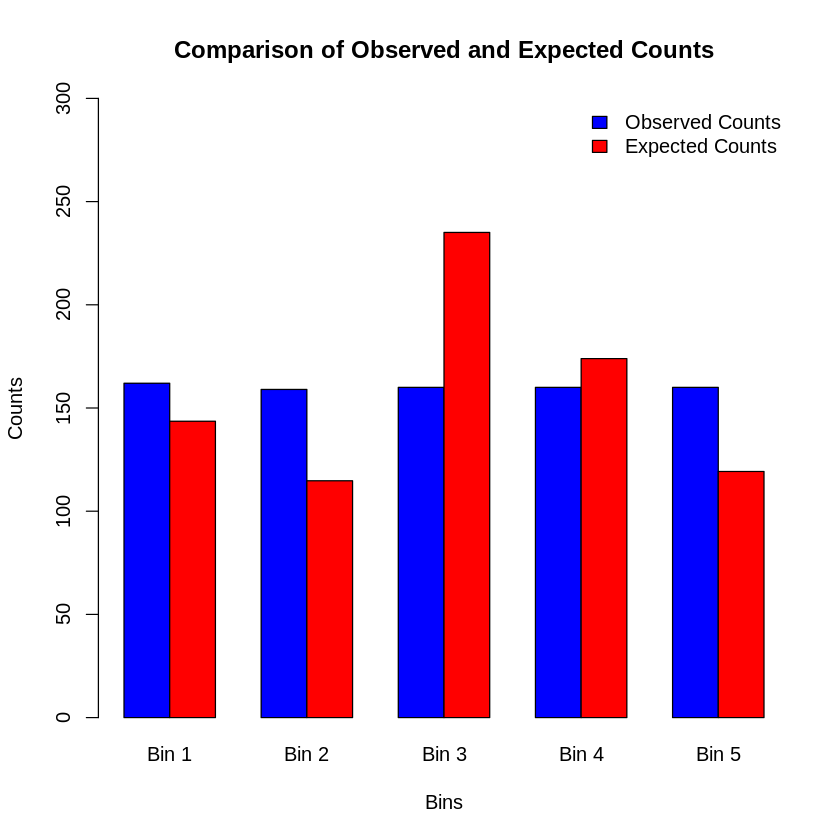

In [6]:
bins <- paste("Bin", 1:5)
counts_matrix <- rbind(obs_counts, expected_counts)

bar_colors <- c("blue", "red")

barplot(
  counts_matrix,
  beside = TRUE,
  names.arg = bins,
  col = bar_colors,
  ylim = c(0, 300),
  ylab = "Counts",
  xlab = "Bins",
  main = "Comparison of Observed and Expected Counts"
)

legend(
  "topright",
  legend = c("Observed Counts", "Expected Counts"),
  fill = bar_colors,
  bty = "n"
)

In [7]:
chi_sq_stat <- sum((obs_counts - expected_counts)^2 / expected_counts)
df <- n_bins - 1 - 2  # bins - 1 - number of estimated parameters (mu, sigma)
p_value <- pchisq(chi_sq_stat, df = df, lower.tail = FALSE)

cat("Chi-squared statistic:", chi_sq_stat, "\n")
cat("Degrees of freedom:", df, "\n")
cat("p-value:", p_value, "\n")

if (p_value > 0.05) {
  cat("Fail to reject null: Data may follow a log-normal distribution.\n")
} else {
  cat("Reject null: Data does not follow a log-normal distribution.\n")
}

Chi-squared statistic: 58.4308 
Degrees of freedom: 2 
p-value: 2.050748e-13 
Reject null: Data does not follow a log-normal distribution.
